In [ ]:
import pandas as pd
import spacy
import os
import glob
import re
import string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import plotly.express as px
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import collections
from nltk import bigrams
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_2017 = pd.read_csv('/content/drive/MyDrive/2017.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/2018.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/2019.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/2020.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/2022.csv')

In [ ]:
df = pd.DataFrame()
df = df.append(df_2017)
df = df.append(df_2018)
df = df.append(df_2019)
df = df.append(df_2020)
df = df.append(df_2021)
df = df.append(df_2022)
df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count,Unnamed: 36
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,945748731197980672,945712432416137217,1514319043000.0,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0,NaN
1024,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Letâ€™s make the roaring 20â€™s happen!,en,[],...,NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0,NaN
1025,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0,NaN
1026,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla ðŸ”¥,und,[],...,NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0,NaN


In [ ]:
df = df[['date','tweet']]
df

,date,tweet
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon
2,2017-12-26 20:10:43,@dd_hogan Ok
3,2017-12-26 18:57:03,@Jason @Tesla Sure
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...,...
1023,2022-01-03,https://t.co/LA9hPzVlGx
1024,2022-01-02,Letâ€™s make the roaring 20â€™s happen!
1025,2022-01-02,Great work by Tesla team worldwide!
1026,2022-01-01,@BLKMDL3 @Tesla ðŸ”¥


In [ ]:
df['year'] = df['date'].str.slice(0, 4)

In [ ]:
df['tweet']=df['tweet'].str.lower()
df['tweet']=df['tweet'].str.replace('-'," ")

In [ ]:
df['tweet'] = [re.sub(r'[@&#][A-Za-z0-9_]+',' ',str(x)) for x in df['tweet']]
df['tweet'] = [re.sub(r'http\S+', ' ',str(x)) for x in df['tweet']]
df['tweet'] = [re.sub(r'www.\S+', ' ',str(x)) for x in df['tweet']]
df['tweet'] = [re.sub(r'[()\/…!’”;:,?.*]', ' ',str(x)) for x in df['tweet']]
df['tweet'] = [re.sub(r'[^a-z0-9]', ' ',str(x)) for x in df['tweet']]
df['tweet'] = [re.sub(r'[0-9]+', ' ',str(x)) for x in df['tweet']]

In [ ]:
def remove_Stopwords(x):
  words = word_tokenize(x)
  withoutStopwords = [i for i in words if not i in set(stop_words)]
  return ' '.join(withoutStopwords)
  

In [ ]:
df['tweet']=df['tweet'].apply(remove_Stopwords)

In [ ]:
df = df[df['tweet'].notna()]

In [ ]:
df

,date,tweet,year
0,2017-12-27 00:32:57,coming soon,2017
1,2017-12-26 20:14:45,vastly better maps nav coming soon,2017
2,2017-12-26 20:10:43,ok,2017
3,2017-12-26 18:57:03,sure,2017
4,2017-12-26 18:55:42,yeah terrible upgrade old linux os bunch drive...,2017
...,...,...,...
1023,2022-01-03,,2022
1024,2022-01-02,let make roaring happen,2022
1025,2022-01-02,great work tesla team worldwide,2022
1026,2022-01-01,,2022


In [ ]:
word_frequency_2017= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2017']['tweet'])))
word_frequency_2018= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2018']['tweet'])))
word_frequency_2019= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2019']['tweet'])))
word_frequency_2020= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2020']['tweet'])))
word_frequency_2021= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2021']['tweet'])))
word_frequency_2022= nltk.FreqDist(word_tokenize(' '.join(df[df['year']=='2022']['tweet'])))

In [ ]:
word_frequency_2017

FreqDist({'tesla': 222, 'model': 177, 'yes': 162, 'good': 159, 'like': 147, 'one': 138, 'first': 129, 'next': 129, 'yeah': 117, 'right': 108, ...})

In [ ]:
Elon_Tweets_2017 = pd.DataFrame(word_frequency_2017.items(),columns =['Word','Count'])
Elon_Tweets_2018 = pd.DataFrame(word_frequency_2018.items(),columns =['Word','Count'])
Elon_Tweets_2019 = pd.DataFrame(word_frequency_2019.items(),columns =['Word','Count'])
Elon_Tweets_2020 = pd.DataFrame(word_frequency_2020.items(),columns =['Word','Count'])
Elon_Tweets_2021 = pd.DataFrame(word_frequency_2021.items(),columns =['Word','Count'])
Elon_Tweets_2022 = pd.DataFrame(word_frequency_2022.items(),columns =['Word','Count'])
Elon_Tweets_2017= Elon_Tweets_2017.sort_values(['Count'],ascending =False)
Elon_Tweets_2018= Elon_Tweets_2018.sort_values(['Count'],ascending =False)
Elon_Tweets_2019= Elon_Tweets_2019.sort_values(['Count'],ascending =False)
Elon_Tweets_2020= Elon_Tweets_2020.sort_values(['Count'],ascending =False)
Elon_Tweets_2021= Elon_Tweets_2021.sort_values(['Count'],ascending =False)
Elon_Tweets_2022= Elon_Tweets_2022.sort_values(['Count'],ascending =False)

TOP 10 words by Elon in 2017

In [ ]:
print(Elon_Tweets_2017.head(10))
px.histogram(Elon_Tweets_2017, x ='Count', nbins =10)

      Word  Count
104  tesla    222
56   model    177
156    yes    162
64    good    159
37    like    147
62     one    138
52    next    129
16   first    129
8     yeah    117
113  would    108


TOP 10 words by Elon in 2018

In [ ]:
print(Elon_Tweets_2018.head())
px.histogram(Elon_Tweets_2018, x ='Count', nbins =10)

      Word  Count  Rank
1    tesla    877     1
113    car    363     2
28     NaN    330     3
29     yes    324     4
188   good    308     5


TOP 10 words by Elon in 2019

In [ ]:
print(Elon_Tweets_2019.head())
px.histogram(Elon_Tweets_2019, x ='Count', nbins =10)

      Word  Count  Rank
195  tesla    504     1
331    NaN    328     2
106    yes    307     3
55   would    198     4
191  great    193     5


TOP 10 words by Elon in 2020

In [ ]:
print(Elon_Tweets_2020.head())
px.histogram(Elon_Tweets_2020, x ='Count', nbins =10)

      Word  Count  Rank
324    NaN    233     1
11   tesla    191     2
74     yes    160     3
25   great    128     4
200   much    120     5


TOP 10 words by Elon in 2021

In [ ]:
print(Elon_Tweets_2021.head())
px.histogram(Elon_Tweets_2021, x ='Count', nbins =10)

      Word  Count  Rank
0      NaN    386     1
49   tesla    213     2
66   great    102     3
144   good     98     4
112   much     93     5


TOP 10 words by Elon in 2022

In [ ]:
print(Elon_Tweets_2022.head())
px.histogram(Elon_Tweets_2022, x ='Count', nbins =10)

       Word  Count  Rank
51      NaN    192     1
64    tesla     62     2
55   people     34     3
108     yes     32     4
61    would     32     5


### Zipf's Law 

Text(0.5, 1.0, 'word frequencies and rank for 2017')

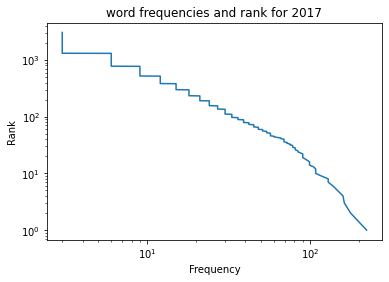

In [ ]:
Elon_Tweets_2017['Rank'] = np.arange(len(Elon_Tweets_2017))+1
plt.loglog(Elon_Tweets_2017['Count'], Elon_Tweets_2017['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2017')

Text(0.5, 1.0, 'word frequencies and rank for 2018')

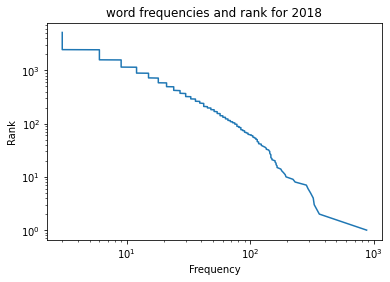

In [ ]:
Elon_Tweets_2018['Rank'] = np.arange(len(Elon_Tweets_2018))+1
plt.loglog(Elon_Tweets_2018['Count'], Elon_Tweets_2018['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2018')


Text(0.5, 1.0, 'word frequencies and rank for 2019')

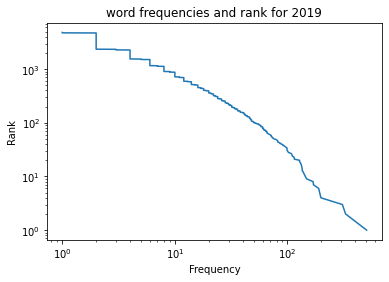

In [ ]:
Elon_Tweets_2019['Rank'] = np.arange(len(Elon_Tweets_2019))+1
plt.loglog(Elon_Tweets_2019['Count'], Elon_Tweets_2019['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2019')

Text(0.5, 1.0, 'word frequencies and rank for 2019')

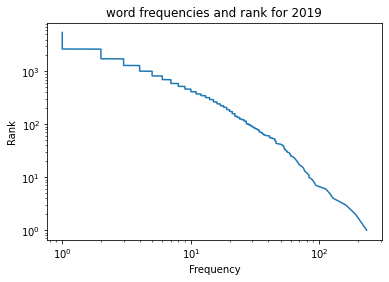

In [ ]:
Elon_Tweets_2020['Rank'] = np.arange(len(Elon_Tweets_2020))+1
plt.loglog(Elon_Tweets_2020['Count'], Elon_Tweets_2020['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2019')

Text(0.5, 1.0, 'word frequencies and rank for 2019')

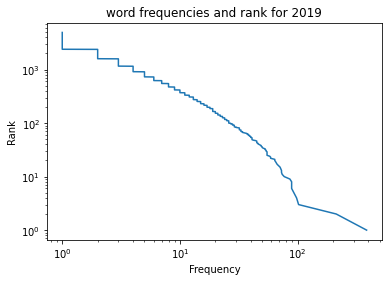

In [ ]:
Elon_Tweets_2021['Rank'] = np.arange(len(Elon_Tweets_2021))+1
plt.loglog(Elon_Tweets_2021['Count'], Elon_Tweets_2021['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2019')

Text(0.5, 1.0, 'word frequencies and rank for 2019')

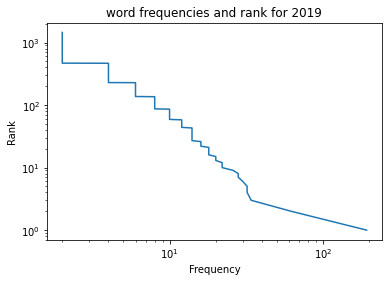

In [ ]:
Elon_Tweets_2022['Rank'] = np.arange(len(Elon_Tweets_2022))+1
plt.loglog(Elon_Tweets_2022['Count'], Elon_Tweets_2022['Rank'])
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.title('word frequencies and rank for 2019')

BIGRAM NETWORK GRAPHS

In [ ]:
def split_words(x):
    return word_tokenize(x)
df['Split Words'] = df['tweet'].apply(split_words)

In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2017']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l

[(('coming', 'soon'), 45),
 (('falcon', 'heavy'), 45),
 (('boring', 'company'), 39),
 (('next', 'year'), 30),
 (('good', 'point'), 27),
 (('model', 'x'), 27),
 (('next', 'week'), 24),
 (('next', 'month'), 21),
 (('boring', 'machine'), 18),
 (('tesla', 'semi'), 18),
 (('upper', 'stage'), 18),
 (('looks', 'like'), 18),
 (('way', 'go'), 15),
 (('tunnel', 'boring'), 15),
 (('sounds', 'like'), 12),
 (('tesla', 'owners'), 12),
 (('hats', 'sold'), 12),
 (('rocket', 'booster'), 12),
 (('truck', 'unveil'), 12),
 (('make', 'sure'), 12),
 (('looking', 'forward'), 12),
 (('kwh', 'pack'), 12),
 (('hw', 'autopilot'), 12),
 (('monty', 'python'), 12),
 (('gon', 'na'), 9),
 (('like', 'good'), 9),
 (('pickup', 'truck'), 9),
 (('tesla', 'team'), 9),
 (('easter', 'egg'), 9),
 (('lands', 'droneship'), 9)]

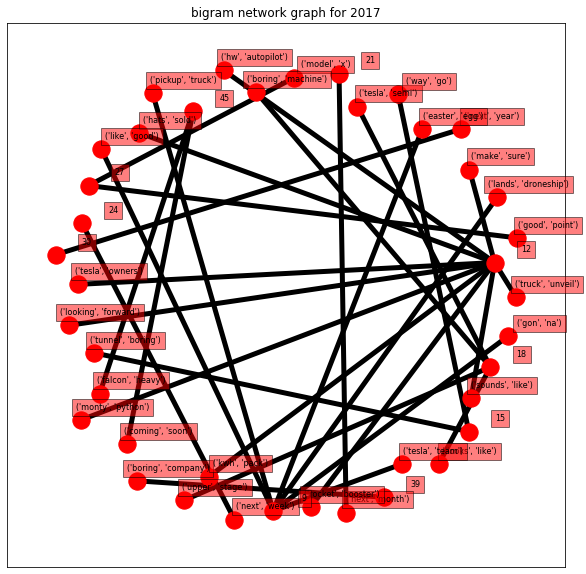

In [ ]:
G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2017')    
plt.show()


In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2018']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l

[(('next', 'year'), 75),
 (('coming', 'soon'), 66),
 (('boring', 'company'), 48),
 (('falcon', 'heavy'), 42),
 (('tesla', 'team'), 35),
 (('good', 'idea'), 33),
 (('dual', 'motor'), 33),
 (('test', 'drive'), 30),
 (('end', 'next'), 30),
 (('model', 'performance'), 30),
 (('tesla', 'owners'), 27),
 (('next', 'week'), 27),
 (('years', 'ago'), 27),
 (('model', 'x'), 27),
 (('good', 'point'), 27),
 (('tesla', 'service'), 24),
 (('long', 'term'), 24),
 (('high', 'speed'), 21),
 (('self', 'driving'), 21),
 (('upper', 'stage'), 21),
 (('tesla', 'factory'), 21),
 (('almost', 'done'), 18),
 (('mr', 'steven'), 18),
 (('north', 'america'), 18),
 (('free', 'supercharging'), 18),
 (('front', 'rear'), 18),
 (('model', 'production'), 18),
 (('mini', 'sub'), 18),
 (('electric', 'car'), 15),
 (('tax', 'credit'), 15)]

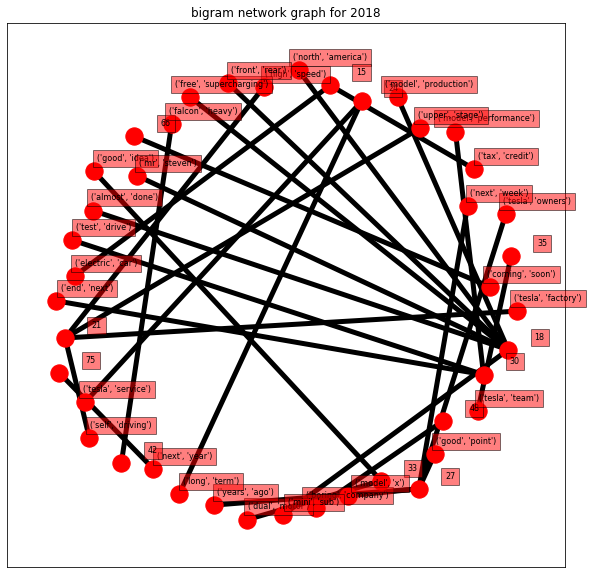

In [ ]:
G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2018')    
plt.show()

In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2019']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l

[(('self', 'driving'), 44),
 (('coming', 'soon'), 40),
 (('full', 'self'), 40),
 (('next', 'week'), 28),
 (('next', 'year'), 28),
 (('super', 'heavy'), 28),
 (('early', 'access'), 26),
 (('smart', 'summon'), 22),
 (('tesla', 'solar'), 22),
 (('good', 'point'), 18),
 (('tesla', 'team'), 18),
 (('per', 'year'), 18),
 (('one', 'day'), 18),
 (('crew', 'dragon'), 18),
 (('years', 'ago'), 18),
 (('order', 'online'), 18),
 (('fsd', 'computer'), 18),
 (('falcon', 'heavy'), 18),
 (('haha', 'true'), 17),
 (('would', 'cool'), 16),
 (('long', 'term'), 16),
 (('great', 'work'), 16),
 (('tesla', 'owners'), 16),
 (('would', 'great'), 16),
 (('pretty', 'much'), 15),
 (('wide', 'release'), 14),
 (('something', 'like'), 14),
 (('electric', 'cars'), 14),
 (('tesla', 'full'), 14),
 (('driving', 'option'), 14)]

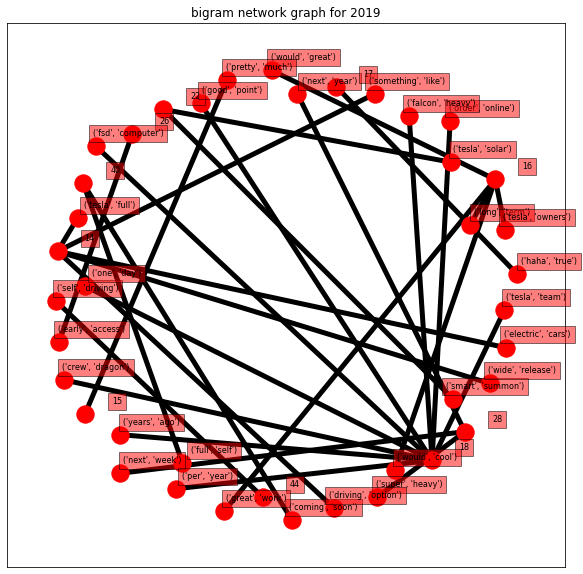

In [ ]:

G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2019')    
plt.show()

In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2020']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l


[(('pretty', 'much'), 35),
 (('coming', 'soon'), 19),
 (('giga', 'berlin'), 18),
 (('static', 'fire'), 13),
 (('haha', 'true'), 12),
 (('false', 'positive'), 12),
 (('long', 'term'), 12),
 (('good', 'point'), 11),
 (('next', 'week'), 10),
 (('years', 'ago'), 10),
 (('self', 'driving'), 10),
 (('well', 'said'), 10),
 (('would', 'great'), 9),
 (('life', 'multiplanetary'), 9),
 (('false', 'positives'), 9),
 (('production', 'system'), 9),
 (('much', 'appreciated'), 9),
 (('next', 'month'), 8),
 (('looks', 'like'), 8),
 (('per', 'year'), 8),
 (('volume', 'production'), 8),
 (('tesla', 'team'), 8),
 (('great', 'work'), 8),
 (('next', 'level'), 8),
 (('super', 'heavy'), 8),
 (('sustainable', 'energy'), 8),
 (('make', 'sense'), 7),
 (('next', 'year'), 7),
 (('header', 'tank'), 7),
 (('starship', 'sn'), 7)]

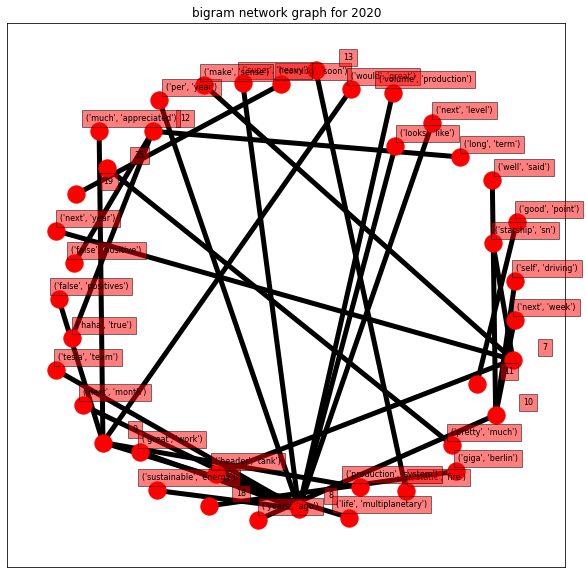

In [ ]:
G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2020')    
plt.show()

In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2021']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l

[(('fsd', 'beta'), 21),
 (('long', 'term'), 19),
 (('pure', 'vision'), 16),
 (('life', 'multiplanetary'), 16),
 (('self', 'driving'), 16),
 (('next', 'week'), 15),
 (('next', 'year'), 14),
 (('super', 'heavy'), 13),
 (('pretty', 'much'), 13),
 (('supply', 'chain'), 13),
 (('real', 'world'), 13),
 (('later', 'year'), 12),
 (('doo', 'doo'), 12),
 (('next', 'month'), 11),
 (('good', 'point'), 11),
 (('world', 'ai'), 11),
 (('coming', 'soon'), 10),
 (('payload', 'orbit'), 10),
 (('haha', 'true'), 10),
 (('make', 'life'), 10),
 (('giga', 'berlin'), 10),
 (('sustainable', 'energy'), 9),
 (('regulatory', 'approval'), 9),
 (('great', 'work'), 9),
 (('tesla', 'ai'), 9),
 (('tesla', 'team'), 8),
 (('looks', 'like'), 8),
 (('orbital', 'launch'), 8),
 (('energy', 'density'), 8),
 (('makes', 'sense'), 7)]

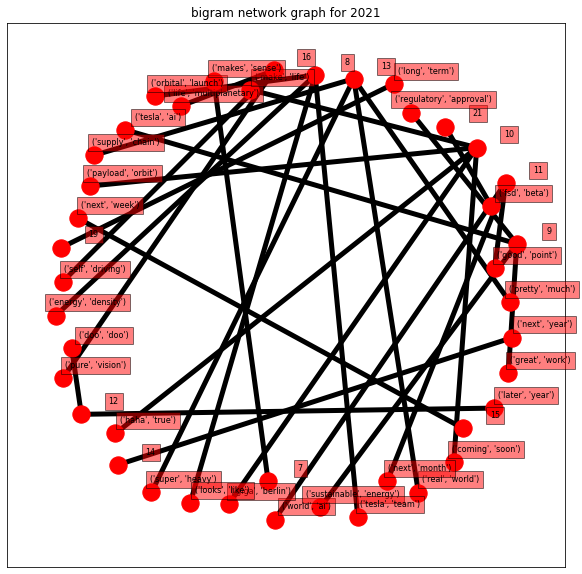

In [ ]:

G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=5)

nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2021')    
plt.show()

In [ ]:
bigram_network_graph = [list(bigrams(i)) for i in df[df['year']=='2022']['Split Words']]
flatten_list = list(itertools.chain(*bigram_network_graph))
count_of_bigrams = collections.Counter(flatten_list)
l = list(list(count_of_bigrams.most_common(30)))
l

[(('birth', 'rate'), 8),
 (('model', 'x'), 8),
 (('sustainable', 'energy'), 6),
 (('work', 'tesla'), 6),
 (('self', 'driving'), 6),
 (('neural', 'nets'), 6),
 (('last', 'year'), 6),
 (('life', 'multiplanetary'), 6),
 (('starlink', 'terminals'), 4),
 (('news', 'sources'), 4),
 (('oil', 'gas'), 4),
 (('user', 'terminals'), 4),
 (('still', 'working'), 4),
 (('class', 'action'), 4),
 (('phased', 'array'), 4),
 (('bay', 'area'), 4),
 (('north', 'america'), 4),
 (('electric', 'vehicles'), 4),
 (('tesla', 'would'), 4),
 (('saints', 'row'), 4),
 (('coming', 'soon'), 4),
 (('links', 'activate'), 4),
 (('road', 'system'), 4),
 (('system', 'designed'), 4),
 (('general', 'solution'), 4),
 (('solution', 'self'), 4),
 (('real', 'world'), 4),
 (('world', 'ai'), 4),
 (('use', 'c'), 4),
 (('tight', 'c'), 4)]

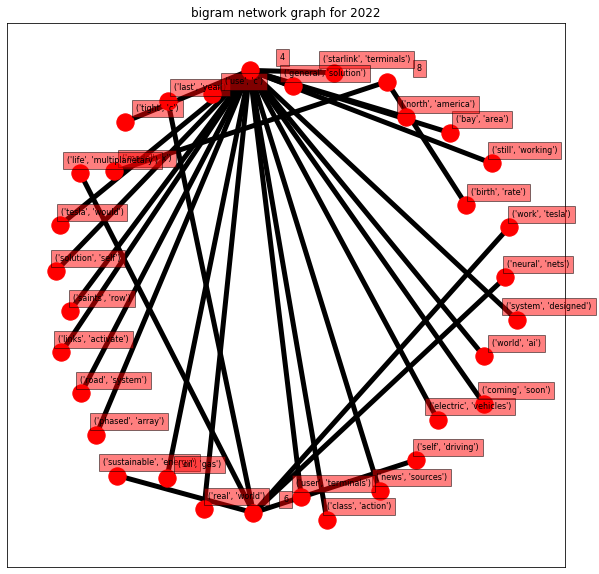

In [ ]:

G = nx.Graph()
for i in range(0,len(l)):
    G.add_edge(l[i][0],l[i][1])
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw_networkx(G, pos,
                 font_size=12,
                 width=5,
                 edge_color='black',
                 node_color='red',
                 with_labels = False,
                 ax=ax)
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.50),
            horizontalalignment='center', fontsize=8)
plt.title('bigram network graph for 2022')    
plt.show()